## PicoCTF Exercises (Homework 1)
### Sebastián Navarro


## interendec

### Solution 1

The name of this challenge "interencdec" gives us a clue that it requires decoding something or swapping bits. The text could be in a Base64 encoding. So, I went to the website https://www.base64decode.org/ to decode the provided text.

* **Encoded text:**
YidkM0JxZGtwQlRYdHFhR3g2YUhsZmF6TnFlVGwzWVROclgyeG9OakJzTURCcGZRPT0nCg==

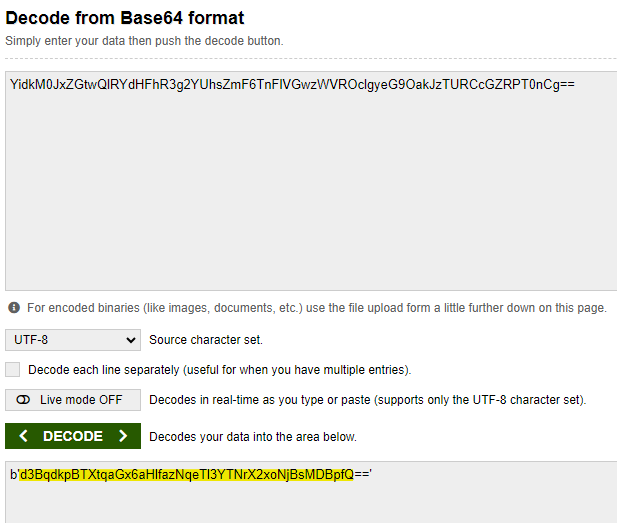

* **Decoded text:**
d3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrX2xoNjBsMDBpfQ

We decode it again and we get
**wpjvJAM{jhlzhy_k3jy9wa3k_lh60l00i}**

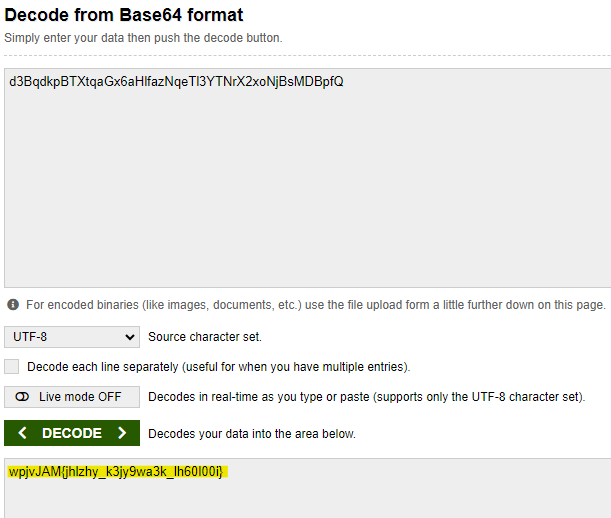

This combination of letters can indicate a flag with the format picoCTF{ }. Therefore we know that _J_ is _C_, _A_ is _T_ and M is _F_ so it is a Caesar cipher shifted **7 positions** backwards

In [3]:
# Function of Caesar cipher decryption
def caesar_cipher_decrypt(text, shift):
    # Initialize the plain text
    plain_text = ""
    
    for char in text:
        # Check if the character is a letter
        if char.isalpha():
            # Check if the character is uppercase
            if char.isupper():
                # Shift the character
                plain_text += chr((ord(char) - 65 - shift) % 26 + 65)
            # Check if the character is lowercase
            elif char.islower():
                # Shift the character
                plain_text += chr((ord(char) - 97 - shift) % 26 + 97)
        else:
            # Add the character to the plain text
            plain_text += char
    
    return plain_text


plain_text = "wpjvJAM{jhlzhy_k3jy9wa3k_lh60l00i}"
shift = 7

print(caesar_cipher_decrypt(plain_text, shift))


picoCTF{caesar_d3cr9pt3d_ea60e00b}


### Solution 2

From the previous solution, we already know that it is a base64 encoded text, so I went to the website https://gchq.github.io/CyberChef/ and used the recipe **From Base64** to decode the text

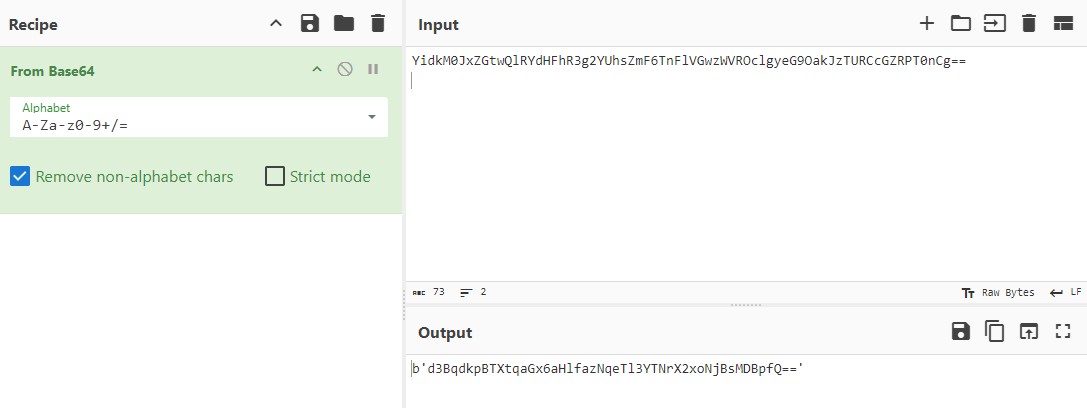

We decode again and we have:

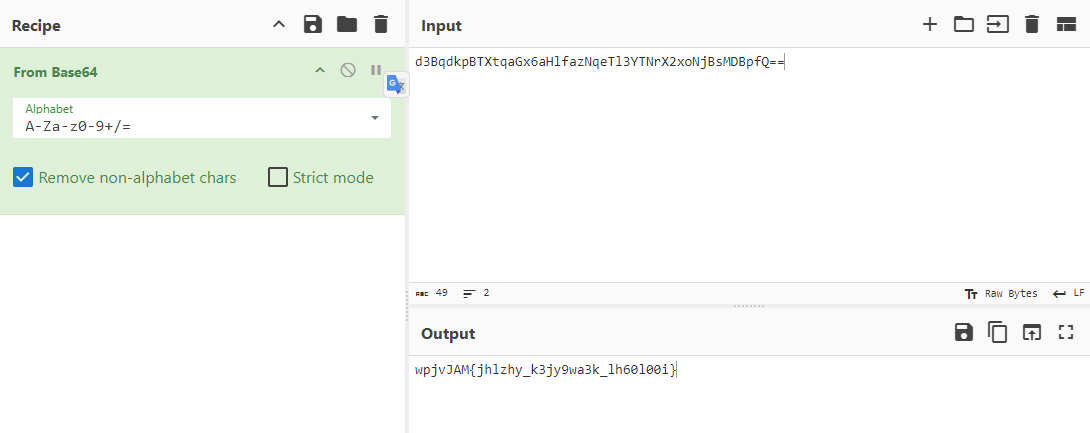

Finally, I used the recipe **ROT 13 Brute Force** to find the flag and got the result in _Amount = 19_

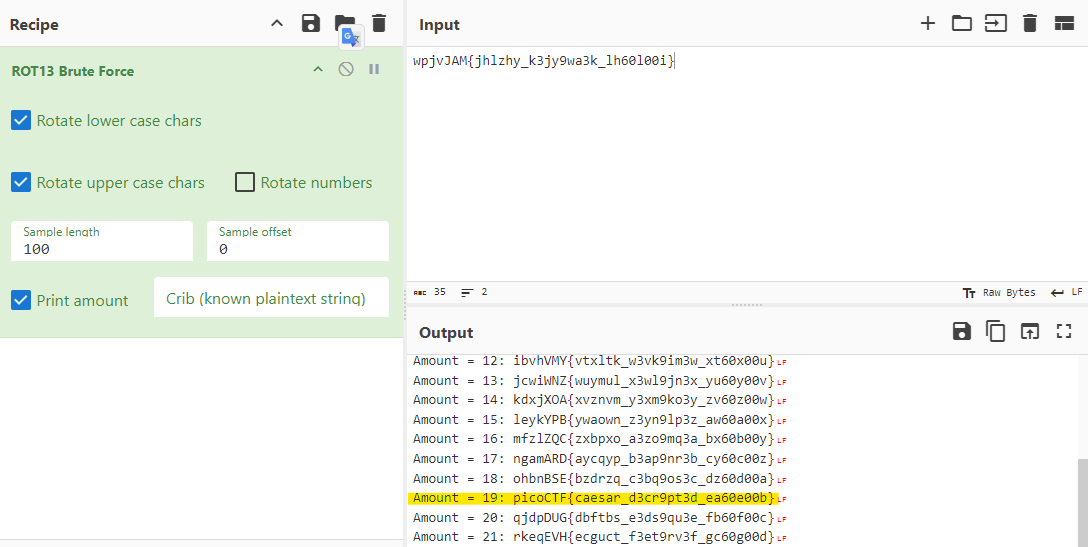

## The Numbers

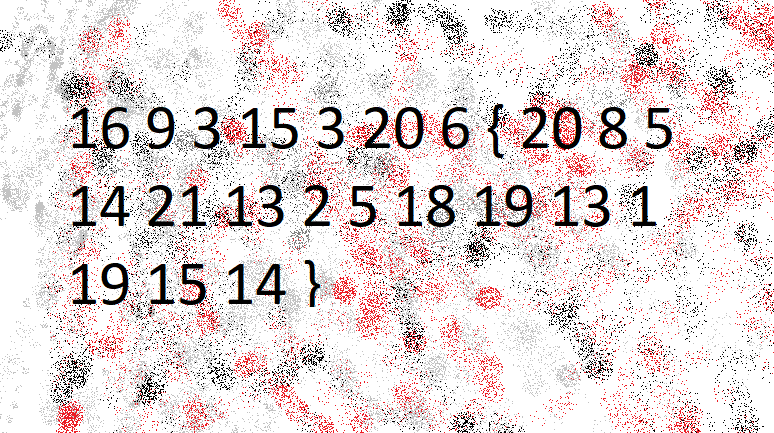

### Solution 1

We can associate the numbers in the image with the common word **PICOCTF{}**. So:
* P = 16
* I = 9
* C = 3
* O = 15
* C = 3
* T = 20
* F = 6

At this point, we can assume that the numbers represent the positions of the letters of the alphabet from A = 1 to Z = 26. So, I wrote some python code to automatically decode the numbers and find the **PICOCTF{THENUMBERSMASON}** flag:

In [2]:
# Function that takes an array of numbers and decrypts them matching with the alphabet example A=1, B=2, C=3, etc.
def decrypt_numbers(numbers):
    # Initialize the plain text
    plain_text = ""
    
    for i, num in enumerate(numbers):
        # Check if the number is within the range of 1-26
        if 1 <= num <= 26:
            # Convert number to corresponding uppercase letter
            plain_text += chr(num + 64)
        else:
            # Add the number as is
            plain_text += str(num)
        
        # Add opening brace after the 7th character
        if i == 6:
            plain_text += "{"
    
    # Add closing brace at the end
    plain_text += "}"
    
    return plain_text

numbers = [16, 9, 3, 15, 3, 20, 6, 20, 8, 5, 14, 21, 13, 2, 5, 18, 19, 13, 1, 19, 15, 14]

print(decrypt_numbers(numbers))

PICOCTF{THENUMBERSMASON}


### Solution 2

I went to the website https://www.dcode.fr/letter-number-cipher and used the tool **Number to Letter A1Z26 Converter** to decipher the numbers, the solution being as follows:

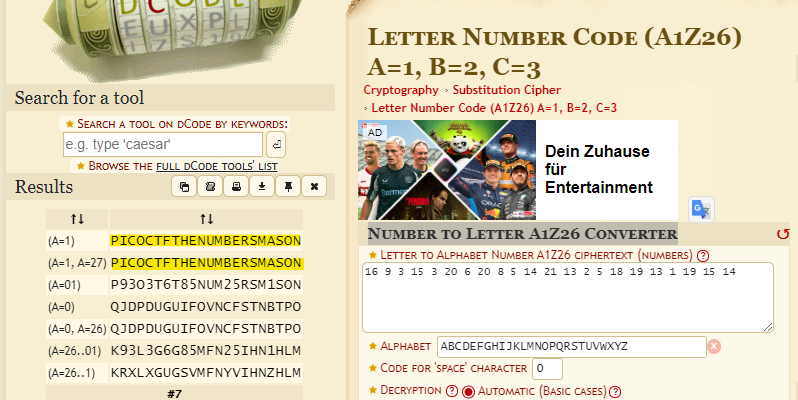

## Rotation

### Solution 1

From the name of the challenge and the clue, we can assume that this is a type of rotation cipher, a cipher where each letter of the alphabet is shifted **n** positions.
In my case, the ciphertext is `xqkwKBN{z0bib1wv_l3kzgxb3l_i4j7l759}`. From the common format **picoCTF{ }** we can assume that:
* p = x
* i = q
* c = k
* o = w
* C = K
* T = B
* F = N

At this point, we can assume that each letter is shifted **8 positions** backwards. I then reused the code from interendec's exercise to decrypt the text and find the **picoCTF{r0tat1on_d3crypt3d_a4b7d759}** flag:

In [1]:
# Function of Caesar cipher decryption
def caesar_cipher_decrypt(text, shift):
    # Initialize the plain text
    plain_text = ""
    
    for char in text:
        # Check if the character is a letter
        if char.isalpha():
            # Check if the character is uppercase
            if char.isupper():
                # Shift the character
                plain_text += chr((ord(char) - 65 - shift) % 26 + 65)
            # Check if the character is lowercase
            elif char.islower():
                # Shift the character
                plain_text += chr((ord(char) - 97 - shift) % 26 + 97)
        else:
            # Add the character to the plain text
            plain_text += char
    
    return plain_text


plain_text = "xqkwKBN{z0bib1wv_l3kzgxb3l_i4j7l759}"
shift = 8

print(caesar_cipher_decrypt(plain_text, shift))


picoCTF{r0tat1on_d3crypt3d_a4b7d759}


### Solution 2

I went to the website https://www.dcode.fr/rot-cipher to decrypt the rotationally encrypted text `xqkwKBN{z0bib1wv_l3kzgxb3l_i4j7l759}`, and using the **ROT Cipher Decoder** tool I found the flag **picoCTF{r0tat1on_d3crypt3d_a4b7d759}**
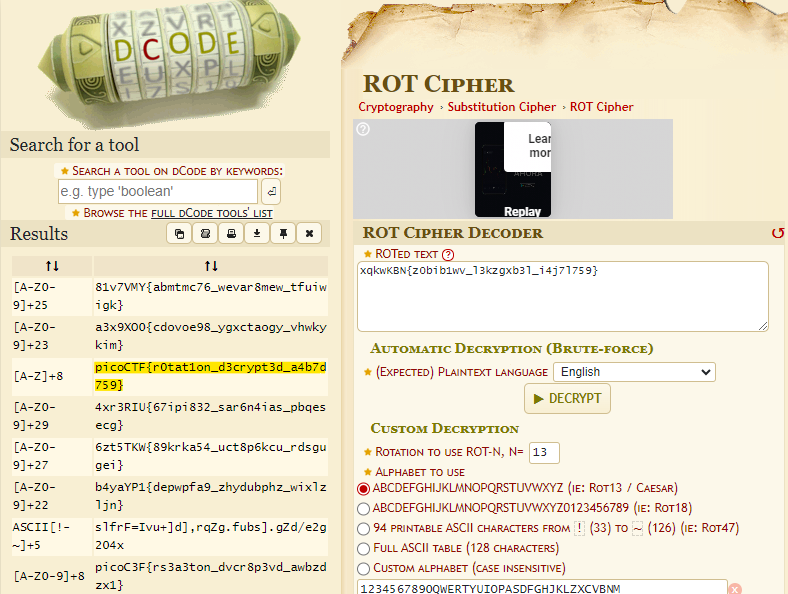

## Custom encryption

### Solution 1

The information provided for the encrypted flag is:
* a = 88
* b = 26
* cipher is: [97965, 185045, 740180, 946995, 1012305, 21770, 827260, 751065, 718410, 457170, 0, 903455, 228585, 54425, 740180, 0, 239470, 936110, 10885, 674870, 261240, 293895, 65310, 65310, 185045, 65310, 283010, 555135, 348320, 533365, 283010, 76195, 130620, 185045]

The code provided is as follows:

In [ ]:
from random import randint
import sys


def generator(g, x, p):
    return pow(g, x) % p


def encrypt(plaintext, key):
    cipher = []
    for char in plaintext:
        cipher.append(((ord(char) * key*311)))
    return cipher


def is_prime(p):
    v = 0
    for i in range(2, p + 1):
        if p % i == 0:
            v = v + 1
    if v > 1:
        return False
    else:
        return True


def dynamic_xor_encrypt(plaintext, text_key):
    cipher_text = ""
    key_length = len(text_key)
    for i, char in enumerate(plaintext[::-1]):
        key_char = text_key[i % key_length]
        encrypted_char = chr(ord(char) ^ ord(key_char))
        cipher_text += encrypted_char
    return cipher_text


def test(plain_text, text_key):
    p = 97
    g = 31
    if not is_prime(p) and not is_prime(g):
        print("Enter prime numbers")
        return
    a = randint(p-10, p)
    b = randint(g-10, g)
    print(f"a = {a}")
    print(f"b = {b}")
    u = generator(g, a, p)
    v = generator(g, b, p)
    key = generator(v, a, p)
    b_key = generator(u, b, p)
    shared_key = None
    if key == b_key:
        shared_key = key
    else:
        print("Invalid key")
        return
    semi_cipher = dynamic_xor_encrypt(plain_text, text_key)
    cipher = encrypt(semi_cipher, shared_key)
    print(f'cipher is: {cipher}')


if __name__ == "__main__":
    message = sys.argv[1]
    test(message, "trudeau")


The code combines symmetric cryptography and key generation using the **Diffie-Hellman** algorithm. One way to solve this challenge could be by using reverse engineering, which involves modifying the following functions:
* `encrypt` -> `decrypt`
  
```python
def decrypt(cipher, key):
    plaintext = ""
    for number in cipher:
        plaintext += chr(number // key // 311)
    return plaintext
```
Instead of converting the plaintext into an encrypted format, for each number in the cipher array, the reverse operation of the encryption is performed, i.e. the number is divided by the key key and then by 311. The result of this reverse operation is then converted into a character using chr(), which converts the numeric value back to an ASCII character and finally concatenates the obtained characters into the variable plaintext

* `dynamic_xor_encrypt` -> `dynamic_xor_decrypt`

```python
def dynamic_xor_decrypt(cipher, text_key):
    decrypted_text = ""
    key_length = len(text_key)
    for i, char in enumerate(cipher):
        key_char = text_key[i % key_length]
        decrypted_char = chr(ord(char) ^ ord(key_char))
        decrypted_text += decrypted_char
    return decrypted_text
```
In this case, the ciphertext is not inverted as in the original code but the ciphertext is traversed in its original form. For each character in the ciphertext the ASCII value of the encrypted character is taken, the corresponding ASCII value of the text key is obtained, again using text_key[i % key_length], the encrypted character and the key are XOR'd and finally converted back to a character with chr() and added to decrypted_text.

Then, we know that in this case, the challenge provides us with the values of `p = 97`, `g = 31`, `a = 88`, `b = 26`, `key = trudeau`. Using these values we generate the values of `v` and `shared key`, then we call the functions we wrote earlier `decrypt` and `dynamic_xor_decrypt` and invert the obtained plaintext to find the flag, like this:
```python
p= 97
g= 31

cipher = [97965, 185045, 740180, 946995, 1012305, 21770, 827260, 751065, 718410, 457170, 0, 903455, 228585, 54425, 740180, 0, 239470, 936110, 10885, 674870, 261240, 293895, 65310, 65310, 185045, 65310, 283010, 555135, 348320, 533365, 283010, 76195, 130620, 185045]

a =88
b = 26
v = generator(g, b, p)
shared_key = generator(v, a, p)
key = "trudeau"


semi_cipher = decrypt(cipher, shared_key)
plain_text = dynamic_xor_decrypt(semi_cipher, key)
plain_text = plain_text[::-1]

print(f'plain text is: {plain_text}')
```

The complete code is as follows and the **picoCTF{custom_d2cr0pt6d_019c831c}** flag was obtained

In [2]:
def generator(g, x, p):
    return pow(g, x) % p

def decrypt(cipher, key):
    plaintext = ""
    for number in cipher:
        plaintext += chr(number // key // 311)
    return plaintext

def dynamic_xor_decrypt(cipher, text_key):
    decrypted_text = ""
    key_length = len(text_key)
    for i, char in enumerate(cipher):
        key_char = text_key[i % key_length]
        decrypted_char = chr(ord(char) ^ ord(key_char))
        decrypted_text += decrypted_char
    return decrypted_text


p= 97
g= 31

cipher = [97965, 185045, 740180, 946995, 1012305, 21770, 827260, 751065, 718410, 457170, 0, 903455, 228585, 54425, 740180, 0, 239470, 936110, 10885, 674870, 261240, 293895, 65310, 65310, 185045, 65310, 283010, 555135, 348320, 533365, 283010, 76195, 130620, 185045]

a =88
b = 26
v = generator(g, b, p)
shared_key = generator(v, a, p)
key = "trudeau"


semi_cipher = decrypt(cipher, shared_key)
plain_text = dynamic_xor_decrypt(semi_cipher, key)
plain_text = plain_text[::-1]

print(f'plain text is: {plain_text}')

plain text is: picoCTF{custom_d2cr0pt6d_019c831c}


### Solution 2

We know that if we apply the XOR operation between the ciphertext and the plaintext we can obtain the key, in the same way that if we do XOR between the plaintext and the key we get the ciphertext, and if we do XOR between the ciphertext and the key we get the plaintext. Therefore, we must discover the permutation that was performed on the key `trudeau`. Beforehand, we already know part of the flag which is the picoCTF text.

In [3]:
def generator(g, x, p):
    return pow(g, x) % p

def decrypt(cipher, key):
    plaintext = ""
    for number in cipher:
        plaintext += chr(number // key // 311)
    return plaintext

def dynamic_xor_decrypt(cipher, text_key):
    decrypted_text = ""
    key_length = len(text_key)
    for i, char in enumerate(cipher[::-1]):
        key_char = text_key[i % key_length]
        decrypted_char = chr(ord(char) ^ ord(key_char))
        decrypted_text += decrypted_char
    return decrypted_text


p= 97
g= 31

cipher = [97965, 185045, 740180, 946995, 1012305, 21770, 827260, 751065, 718410, 457170, 0, 903455, 228585, 54425, 740180, 0, 239470, 936110, 10885, 674870, 261240, 293895, 65310, 65310, 185045, 65310, 283010, 555135, 348320, 533365, 283010, 76195, 130620, 185045]

a =88
b = 26
v = generator(g, b, p)
shared_key = generator(v, a, p)
key = "picoCTF"


plain_text = dynamic_xor_decrypt(decrypt(cipher, shared_key), key)


print(f'plain text is: {plain_text}')

plain text is: aedurtujoriEO^Nh5yCCe:cE
r44+R]


Since by applying XOR between the ciphertext which would be the array of numbers and part of the plaintext that we know picoCTF, we can obtain the permutation of the key `trudeau`. In the output of the above code, we get `aedurtu` which is the only correct permutation that corresponds to the key.

Now, by running `aedurtu` as the key, we get the flag **picoCTF{custom_d2cr0pt6d_019c831c}**

In [4]:
def generator(g, x, p):
    return pow(g, x) % p

def decrypt(cipher, key):
    plaintext = ""
    for number in cipher:
        plaintext += chr(number // key // 311)
    return plaintext

def dynamic_xor_decrypt(cipher, text_key):
    decrypted_text = ""
    key_length = len(text_key)
    for i, char in enumerate(cipher[::-1]):
        key_char = text_key[i % key_length]
        decrypted_char = chr(ord(char) ^ ord(key_char))
        decrypted_text += decrypted_char
    return decrypted_text


p= 97
g= 31

cipher = [97965, 185045, 740180, 946995, 1012305, 21770, 827260, 751065, 718410, 457170, 0, 903455, 228585, 54425, 740180, 0, 239470, 936110, 10885, 674870, 261240, 293895, 65310, 65310, 185045, 65310, 283010, 555135, 348320, 533365, 283010, 76195, 130620, 185045]

a =88
b = 26
v = generator(g, b, p)
shared_key = generator(v, a, p)
key = "aedurtu"


plain_text = dynamic_xor_decrypt(decrypt(cipher, shared_key), key)


print(f'plain text is: {plain_text}')

plain text is: picoCTF{custom_d2cr0pt6d_019c831c}


## C3

### Solution 1

The code provided for the exercise is as follows:

In [ ]:
import sys
chars = ""
from fileinput import input
for line in input():
  chars += line

lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

out = ""

prev = 0
for char in chars:
  cur = lookup1.index(char)
  out += lookup2[(cur - prev) % 40]
  prev = cur

sys.stdout.write(out)

We are also given the ciphertext: `DLSeGAGDgBNJDQJDCFSFnRBIDjgHoDFCFtHDgJpiHtGDmMAQFnRBJKkBAsTMrsPSDDnEFCFtIbEDtDCIbFCFtHTJDKerFldbFObFCFtLBFkBAAAPFnRBJGEkerFlcPgKkImHnIlATJDKbTbFOkdNnsgbnJRMFnRBNAFkBAAAbrcbTKAkOgFpOgFpOpkBAAAAAAAiClFGIPFnRBaKliCgClFGtIBAAAAAAAOgGEkImHnIl`

Therefore, by analyzing the code provided, it is observed that the encryption is based on a system of shifts between the indices of the current character and the previous one. The current index is obtained by locating the encrypted character in `lookup1`, and then concatenating to the output the corresponding character from `lookup2`, whose index is calculated by subtracting the current index from the previous one and applying a cyclic adjustment.

Now, to decrypt the ciphertext, the reverse process must be performed, as follows:

In [ ]:
def decryptC3(ciphertext):
    prev = 0
    for char in ciphertext:
        ciphered_index = lookup2.index(char)
        
        for i in range(len(lookup1)):
            if (i - prev) % 40 == ciphered_index:
                print(lookup1[i], end = "")
                prev = i
                break

The function decrypts the ciphertext by processing it character by character. For each encrypted character, its index in `lookup2` is obtained, which represents the encrypted index. Next, the index of the original character is found in `lookup1` such that, by subtracting the previous index and applying a modulus of 40, it matches the encrypted index. Finally, the characters corresponding to the indices found in `lookup1` are printed. The use of modulus 40 is due to the fact that both `lookup1` and `lookup2` contain 40 characters, which ensures that the indices stay within the bounds of these strings and allows for cyclic decryption behavior.

In [1]:
ciphertext = "DLSeGAGDgBNJDQJDCFSFnRBIDjgHoDFCFtHDgJpiHtGDmMAQFnRBJKkBAsTMrsPSDDnEFCFtIbEDtDCIbFCFtHTJDKerFldbFObFCFtLBFkBAAAPFnRBJGEkerFlcPgKkImHnIlATJDKbTbFOkdNnsgbnJRMFnRBNAFkBAAAbrcbTKAkOgFpOgFpOpkBAAAAAAAiClFGIPFnRBaKliCgClFGtIBAAAAAAAOgGEkImHnIl"
lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"


def decryptC3(ciphertext):
    prev = 0
    for char in ciphertext:
        cur = lookup2.index(char)
        
        for i in range(len(lookup1)):
            if (i - prev) % 40 == cur:
                print(lookup1[i], end = "")
                prev = i
                break
            
            
decryptC3(ciphertext)

#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input
for line in input():
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print chars[i] #prints
        b += 1 / 1


Running the decryption function returns a Python 2 code that, when executed, reveals the **flag** inside the brackets, whose value is **adlibs**. Thus, the final flag is **picoCTF{adlibs}**.

### Solution 2

The code provided can be reverse engineered to decrypt the ciphertext. To do this, the encryption process must be reversed, as follows:

In [ ]:
def decryptC3(ciphertext):
    prev = 0
    for char in ciphertext:
        cur = lookup2.index(char)
        out = lookup1[(cur + prev) % 40]
        print(out, end="")
        prev = lookup1.index(out)

This code decrypts the ciphertext by processing it character by character. For each character, its index in `lookup2` is obtained, representing the encrypted index. The corresponding index of the original character is then looked up in `lookup1` in reverse: by adding the encrypted index to the index of the previous character (`prev`), and applying a modulus of 40 to ensure that the result stays within the bounds of the lists. The variable `prev` is initialized to 0 and updated on each iteration with the index of the newly decrypted character, allowing the offset for the next character to depend on the previously decrypted character.

In [2]:
ciphertext = "DLSeGAGDgBNJDQJDCFSFnRBIDjgHoDFCFtHDgJpiHtGDmMAQFnRBJKkBAsTMrsPSDDnEFCFtIbEDtDCIbFCFtHTJDKerFldbFObFCFtLBFkBAAAPFnRBJGEkerFlcPgKkImHnIlATJDKbTbFOkdNnsgbnJRMFnRBNAFkBAAAbrcbTKAkOgFpOgFpOpkBAAAAAAAiClFGIPFnRBaKliCgClFGtIBAAAAAAAOgGEkImHnIl"
lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"


def decryptC3(ciphertext):
    prev = 0
    for char in ciphertext:
        cur = lookup2.index(char)
        out = lookup1[(cur + prev) % 40]
        print(out, end="")
        prev = lookup1.index(out)
            
            
decryptC3(ciphertext)

#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input
for line in input():
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print chars[i] #prints
        b += 1 / 1


Running the decryption function returns a Python 2 code that, when executed, reveals the **flag** inside the brackets, whose value is **adlibs**. Thus, the final flag is **picoCTF{adlibs}**.